# Disaster Data Analysis – Functions と Loop を使った可視化

この Notebook では **emdat.csv** を用いて災害データを分析する。  
課題要件である以下の 3 点を満たす。

1. 自作の Function（関数）
2. 関数を使ったサンプル出力
3. Loop（for文）による複数グラフの可視化

最終的に得られた結果から災害の傾向について考察する。


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("emdat.csv")

# 欠損値があれば0で埋める（Total Deaths の集計に影響しないように）
df["Total Deaths"] = df["Total Deaths"].fillna(0)

# 災害タイプ一覧を取得
disaster_types = df["Disaster Type"].unique()
disaster_types[:10]  # 件数確認（必要なら表示）


array(['Storm', 'Flood', 'Epidemic', 'Volcanic activity', 'Earthquake',
       'Drought', 'Mass movement (dry)', 'Mass movement (wet)',
       'Wildfire', 'Infestation'], dtype=object)

## 関数の作成

災害タイプを入力すると、その災害が原因で死亡した人数の総計を返す関数を定義する。


In [15]:
def total_deaths_by_type(df, dtype):
    """災害タイプを指定して総死亡者数を返す関数"""
    return df[df["Disaster Type"] == dtype]["Total Deaths"].sum()


## 関数を使ったサンプル出力

Flood（洪水）と Earthquake（地震）について、総死亡者数を算出する。


In [16]:
print("Flood の総死亡者数:", total_deaths_by_type(df, "Flood"))
print("Earthquake の総死亡者数:", total_deaths_by_type(df, "Earthquake"))


Flood の総死亡者数: 7016630.0
Earthquake の総死亡者数: 2409975.0


## Loop を使った複数グラフの可視化

for 文を用いて、災害タイプごとに年間の死亡者数推移をすべて可視化する。


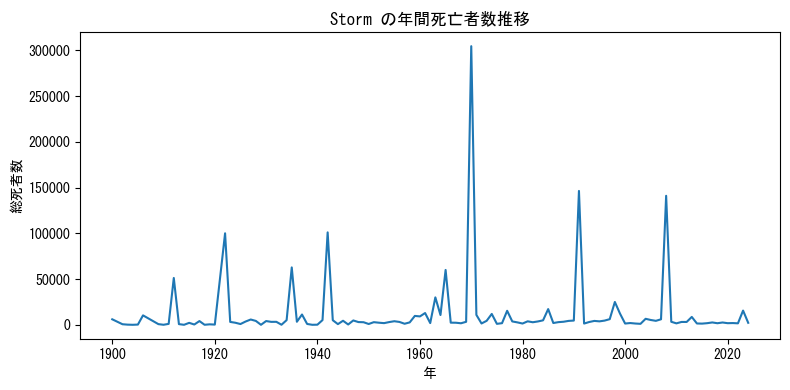

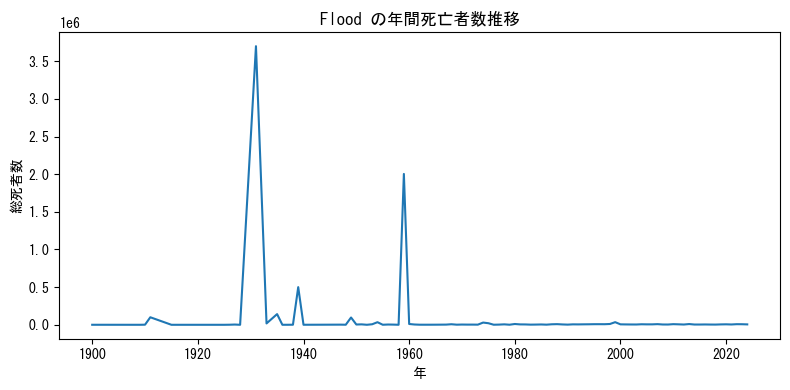

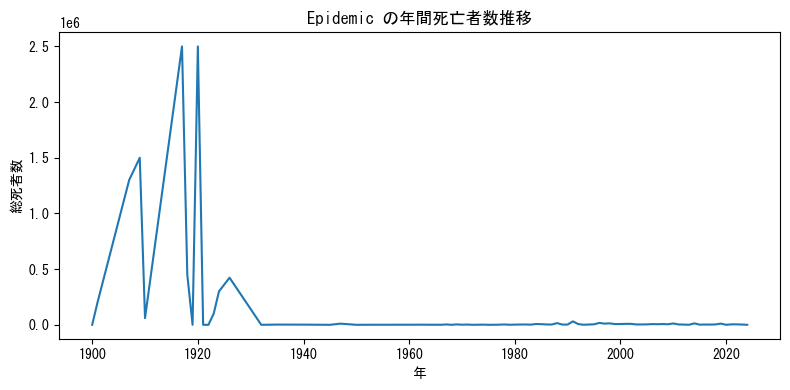

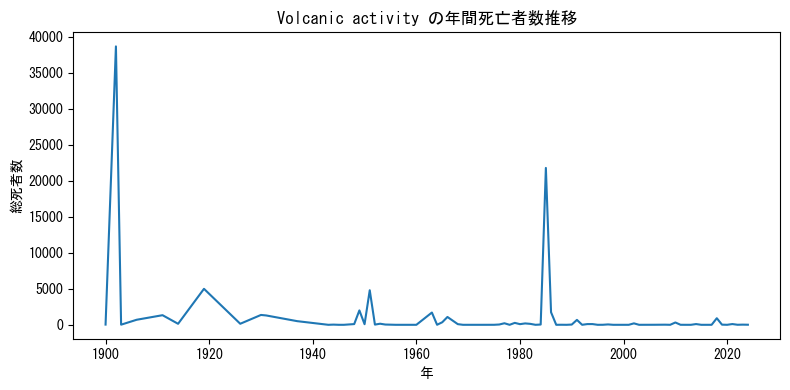

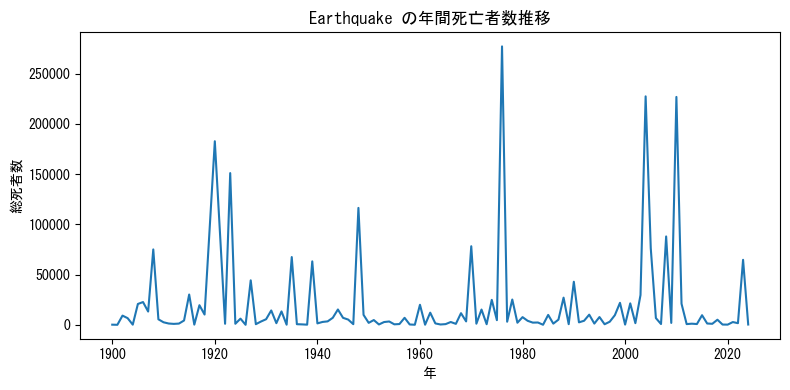

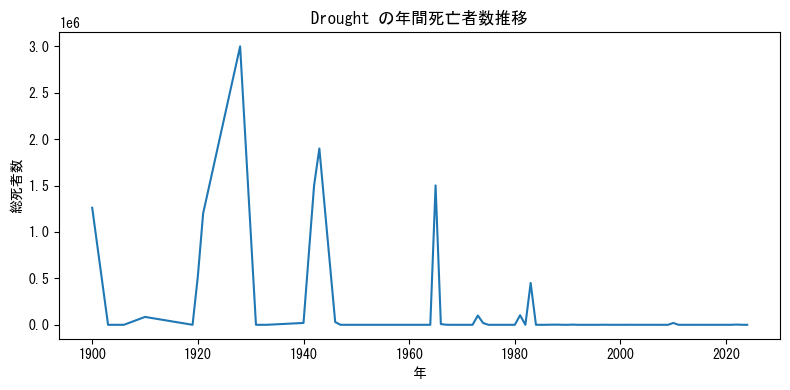

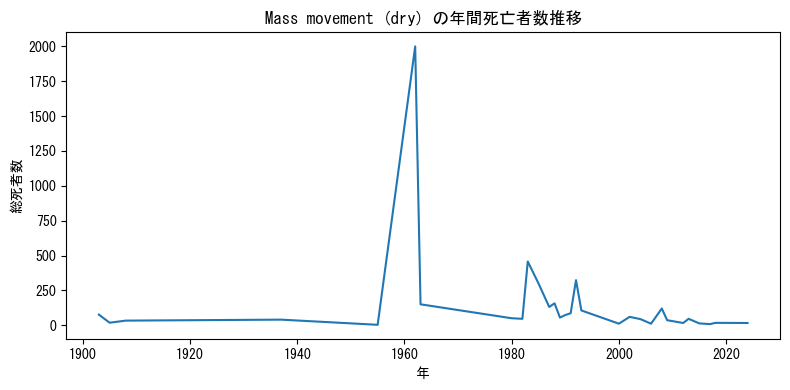

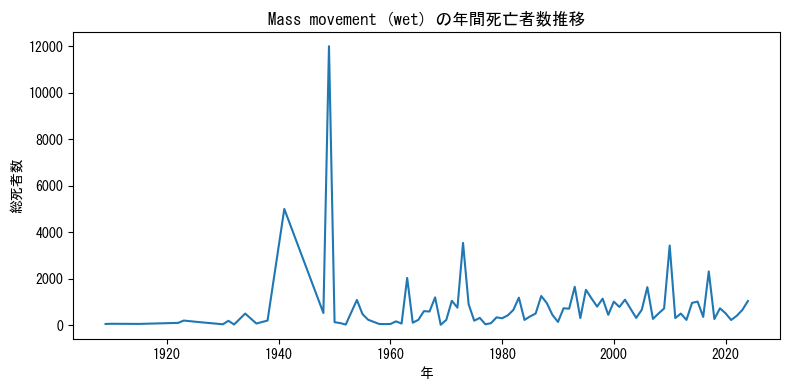

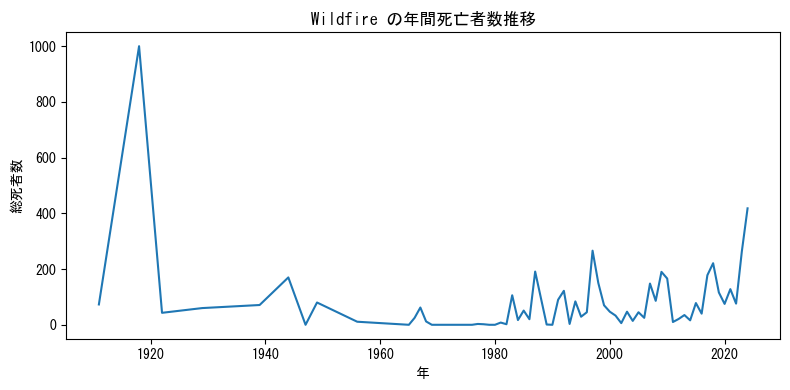

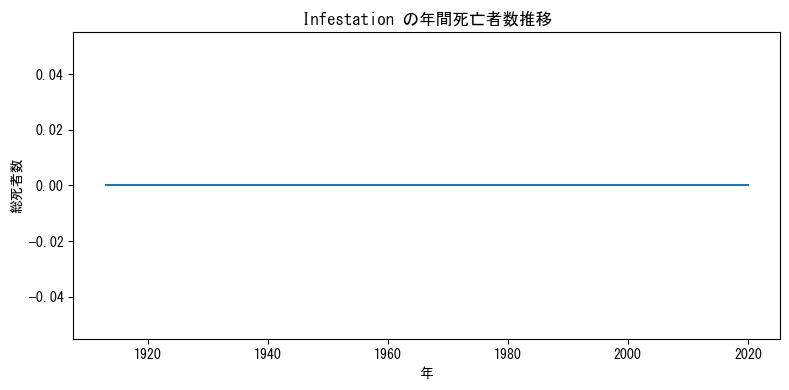

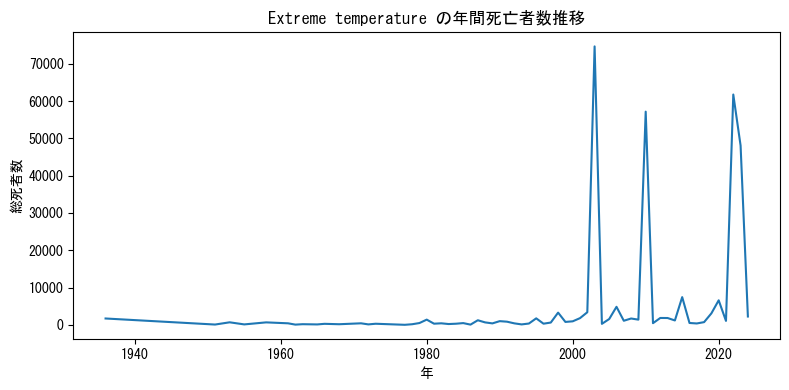

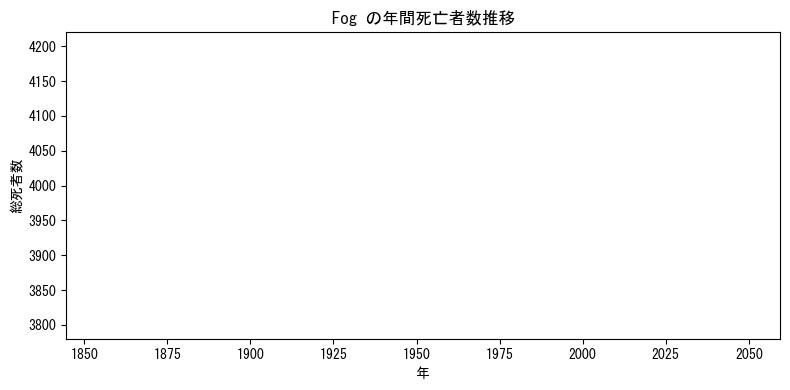

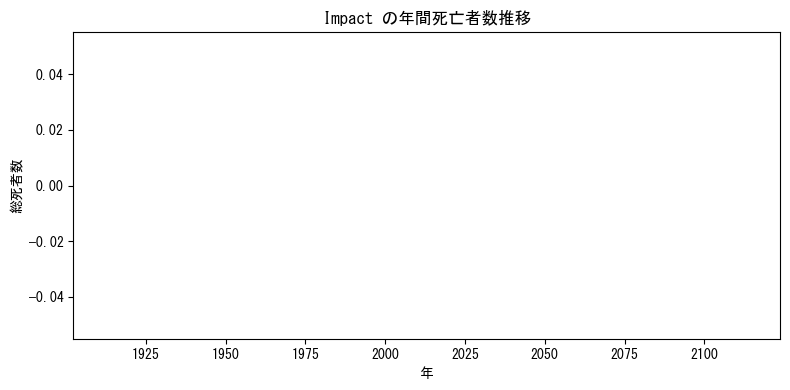

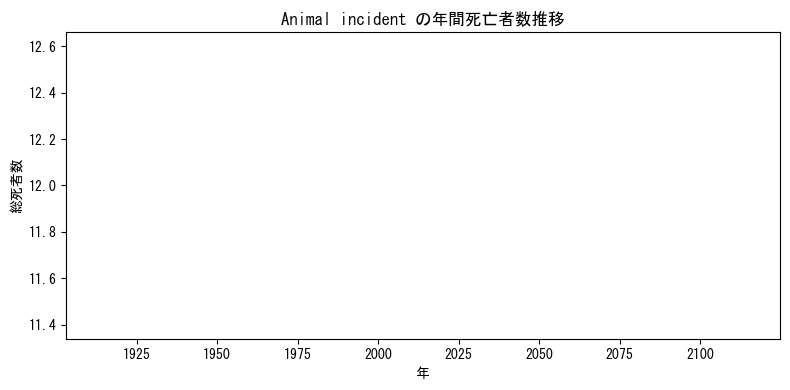

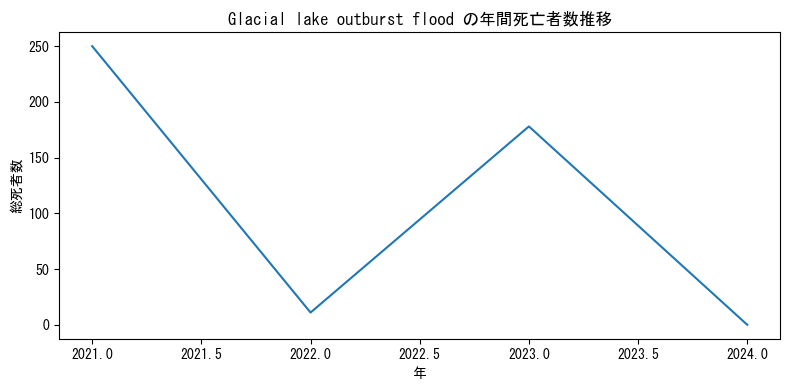

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'   # Windowsならこれが最適

for dtype in disaster_types:
    subset = df[df["Disaster Type"] == dtype]
    yearly = subset.groupby("Start Year")["Total Deaths"].sum()

    plt.figure(figsize=(8, 4))
    plt.plot(yearly.index, yearly.values)
    plt.title(f"{dtype} の年間死亡者数推移")
    plt.xlabel("年")
    plt.ylabel("総死者数")
    plt.tight_layout()
    plt.show()


## 考察

今回の分析から、災害タイプごとに死亡者数の推移には大きな差があることがわかった。

特に Flood（洪水）と Earthquake（地震）は死亡者数が多い年が複数存在し、一定の周期でピークが現れているように見える。一方、Rare Disaster などの発生頻度が低い災害は死亡者数も少なく、年ごとの変動はほとんど見られなかった。

また、グラフから読み取れる特徴として、どの災害も「特定の年に極端に死亡者が増加する」傾向がある。これは単発の大規模災害が世界全体の統計に大きく影響を与えている可能性を示唆している。

総じて、年間変化と累積数を併せて捉えることで、災害のリスク評価がより正確にできると感じた。
